Preprocessing
* [ ] Use raw (without replacing words) 
* [ ] Strip HTML
* [ ] Combine without-accents with with-accents using FeatureUnion

Models
* [ ] RNN/LSTM

In [1]:
!pip install unidecode eli5 xgboost pyvi gensim

     |████████████████████████████████| 245kB 10.7MB/s 
     |████████████████████████████████| 112kB 10.2MB/s 
     |████████████████████████████████| 8.5MB 13.4MB/s 
     |████████████████████████████████| 747kB 55.0MB/s 


In [2]:
!pip install -q tf-models-official==2.3.0

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import string

from tensorflow import keras

In [4]:
data_path = 'drive/My Drive/hiip/data'
train_path = f'{data_path}/train_prep.csv'
test_path = f'{data_path}/test_prep.csv'

In [5]:
train = pd.read_csv(train_path, header=0)
train.head(10)

,id,text,class
0,572c1ca5,rất thích quán này hồi đâu mới mở thì menu còn...,1
1,ff5c34c1,quán có tầng tầng ngồi bệt không gian hơi nhỏ ...,0
2,7c8ae903,lẩu kem và sinh tố ăn luôn ly thật đặc biệt đế...,1
3,96299ec3,thật sự khi vào đây rồi thì thấy các bạn bình ...,1
4,1fefff4f,nhà mình thường xuyên ăn đây cũng có thể coi n...,0
5,7b8f28be,hiện quán đã bổ sung thêm nhiều món mới nhưng ...,1
6,fa1bf75a,quán tuốt trong hẻm lần đầu bạn dẫn đi mà lần ...,0
7,8981b820,mình thích nhất là lê la đi tìm mấy quán cafe ...,1
8,e4bc79b1,mình có đến đây để uống một lần cùng bạn bè kh...,1
9,b0872838,bánh ăn tạm được thôi chứ không ngon so với gi...,0


In [6]:
test = pd.read_csv(test_path, header=0)
list(test['text'][:5])

['mình kêu loại khác nhau mỗi laoi gì cục mà ăn cái nào cũng như nhau cứ như đang ăn loại vậy cuối cùng ngon nhất lại là cục khoai môn chiên mấy loại há cảo xíu mại bánh xẹp ăn ngán cực kỳ mà làm cục to tổ bố để ép khách mua với cái giá không hiểu ăn được cái gì đây mà có người khen ngon',
 'ăn đây từ trc khi chủ nhà xây nhà mới chất lượng không đổi còn giá có tăng từ từ phần mìh yêu là thường trứng hơi no tẹo và cực kì ngon đi vạn kiếp rẽ vào hẻm có biển hoa đàm ni tự và đi chừng là tới vì hẻm nên để xe bên ngoài dọc theo dãy nhà chú chủ sẽ sắp xếp xe lại nhưng mình khuyến khích các mua về ăn tại chỗ thì bàn ghế sạch sẽ ly uống nước là loại dùng lần kết điểm này phục vụ của vk ck chủ thì miễn bàn cực kì thân thiện dạo này có cô nữa phụ bán nhưng không được lanh lẹ lắm star quán chỉ bán buổi sáng tới chừng là hết lâu lâu thì star hành phi tự làm ngon và giòn lắm nhé còn bánh cuốn thì gọi tới đâu làm tới đó không quá lâu và bánh còn ấm',
 'các bạn đến ăn ngay và luôn đi nhé mình từ trướ

## What's inside?

In [ ]:
n_train = len(train)
n_test = len(test)
print(f'Number of training examples: {n_train}')
print(f'Number of test examples: {n_test}')

Number of training examples: 17280
Number of test examples: 3000


In [ ]:
n_pos = len(train[train['class'] == 1])
n_neg = n_train - n_pos
pos_percent = 100*n_pos/n_train
neg_percent = 100 - pos_percent
print(f'Number of positive example: {n_pos} - {pos_percent:.2f}%')
print(f'Number of negative example: {n_neg} - {neg_percent:.2f}%')

Number of positive example: 8553 - 49.50%
Number of negative example: 8727 - 50.50%


## Preprocessing

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train['text'], train['class'], test_size=0.2, random_state=42)

# vectorizer = TfidfVectorizer(ngram_range=(1,5))
# X_train = vectorizer.fit_transform(X_train)
# X_valid = vectorizer.transform(X_valid)

## Baseline Models

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from eli5 import show_weights, show_prediction, explain_weights

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def get_pipe(clf):
  vectorizer = TfidfVectorizer(ngram_range=(1,5))
  pipe = make_pipeline(vectorizer, clf)
  return pipe

def fit_pipe(clf, X_train, y_train):
  vectorizer = TfidfVectorizer(ngram_range=(1,5))
  pipe = make_pipeline(vectorizer, clf)
  pipe.fit(X_train, y_train)
  return pipe

def print_report(pipe, X_test, y_test):
  y_pred = pipe.predict(X_test)
  report = classification_report(y_test, y_pred, target_names=['0','1'])
  print(report)
  print(f'accuracy={accuracy_score(y_test, y_pred)}')
  weights_1 = explain_weights(pipe, top=50)
  weights_2 = explain_weights(pipe, top=50, feature_filter=lambda x: len(x.split()) >= 2)
  plot_confusion_matrix(pipe, X_test, y_test)
  plt.show()
  
  return weights_1, weights_2

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

### LinearSVC

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

           0       0.94      0.85      0.89      2653
           1       0.87      0.95      0.91      2747

    accuracy                           0.90      5400
   macro avg       0.91      0.90      0.90      5400
weighted avg       0.90      0.90      0.90      5400

accuracy=0.9011111111111111


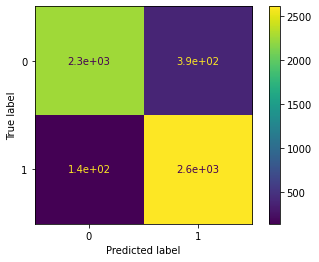

In [ ]:
svc_clf = LinearSVC(C=100, random_state=42)
svc_pipe = fit_pipe(svc_clf, X_train, y_train)
w1, w2 = print_report(svc_pipe, X_valid, y_valid)

In [ ]:
w1

Weight?,Feature
+7.453,ngon
+5.282,rất
+4.512,thích
+4.097,luôn
+4.077,tuyệt
+3.635,đẹp
+3.199,thơm
+2.995,sẽ
+2.900,cực
+2.877,positive


In [ ]:
w2

Weight?,Feature
+2.822,không bị
+2.467,không gian
+2.219,rất ngon
+1.991,tuyệt vời
+1.985,dễ thương
+1.836,sẽ quay
+1.812,thi ch
+1.781,không quá
+1.755,ăn ngon
+1.679,sẽ quay lại


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10829
           1       1.00      1.00      1.00     10771

    accuracy                           1.00     21600
   macro avg       1.00      1.00      1.00     21600
weighted avg       1.00      1.00      1.00     21600

accuracy=1.0


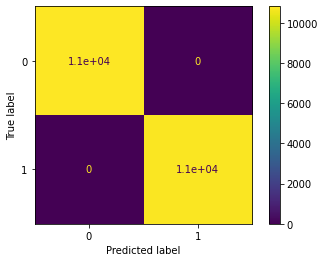

In [ ]:
_, _ = print_report(svc_pipe, X_train, y_train)

### Logistic Regression

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      2653
           1       0.87      0.93      0.90      2747

    accuracy                           0.90      5400
   macro avg       0.90      0.90      0.90      5400
weighted avg       0.90      0.90      0.90      5400

accuracy=0.8962962962962963


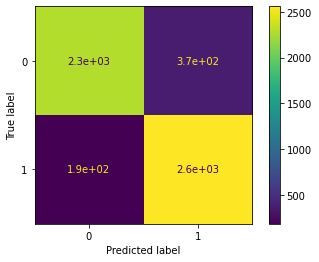

In [ ]:
log_clf = LogisticRegression(C=10, max_iter=250, random_state=42)
log_pipe = fit_pipe(log_clf, X_train, y_train)
w1, w2 = print_report(log_pipe, X_valid, y_valid)

In [ ]:
w1

Weight?,Feature
+19.493,ngon
+17.735,rất
+13.244,thích
+11.858,luôn
+11.521,tuyệt
+10.276,đẹp
+9.212,thơm
+9.190,positive
+8.933,sẽ
+8.485,cực


In [ ]:
w2

Weight?,Feature
+6.998,không gian
+6.899,rất ngon
+6.701,dễ thương
+6.299,không bị
+6.012,tuyệt vời
+5.310,sẽ quay
+5.234,nhiệt tình
+5.065,ăn ngon
+4.989,sẽ quay lại
+4.852,thân thiện


### SGD

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      2653
           1       0.87      0.90      0.88      2747

    accuracy                           0.88      5400
   macro avg       0.88      0.88      0.88      5400
weighted avg       0.88      0.88      0.88      5400

accuracy=0.8770370370370371


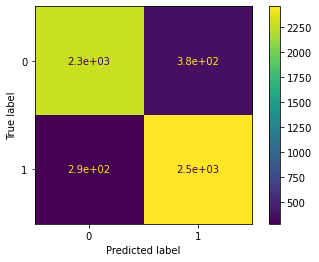

(Explanation(estimator="Pipeline(memory=None,\n         steps=[('tfidfvectorizer',\n                 TfidfVectorizer(analyzer='word', binary=False,\n                                 decode_error='strict',\n                                 dtype=<class 'numpy.float64'>,\n                                 encoding='utf-8', input='content',\n                                 lowercase=True, max_df=1.0, max_features=None,\n                                 min_df=1, ngram_range=(1, 5), norm='l2',\n                                 preprocessor=None, smooth_idf=True,\n                                 stop_words=None, strip_accents=None,\n                                 sublinear_tf=False,\n                                 token...\n                ('sgdclassifier',\n                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,\n                               early_stopping=False, epsilon=0.1, eta0=0.0,\n                               fit_intercept=True, l1_ratio=0.15,\n       

In [ ]:
sgd_clf = SGDClassifier(loss='log', random_state=42)
sgd_pipe = fit_pipe(sgd_clf, X_train, y_train)
print_report(sgd_pipe, X_valid, y_valid)

## More Comeplex Models

### XGBoost

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      2653
           1       0.88      0.78      0.83      2747

    accuracy                           0.83      5400
   macro avg       0.84      0.83      0.83      5400
weighted avg       0.84      0.83      0.83      5400

accuracy=0.8327777777777777


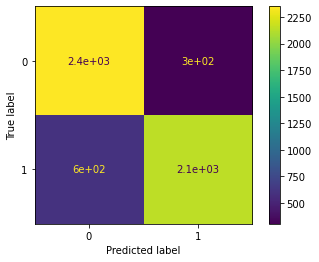

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimator=100, random_state=42)
xgb_pipe = fit_pipe(xgb, X_train, y_train)
w1, w2 = print_report(xgb_pipe, X_valid, y_valid)

### VotingClassifier

In [ ]:
from sklearn.ensemble import VotingClassifier
clf1 = LinearSVC(C=10.0, random_state=42)
clf2 = SGDClassifier()
clf3 = RandomForestClassifier()

hardvoting_clf = VotingClassifier(
                  estimators=[('linearSVM', clf1), ('sgd', clf2), ('rdf', clf3)],
                  voting='hard')
hardvoting_pipe = fit_pipe(hardvoting_clf, X_train, y_train)

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      2653
           1       0.87      0.93      0.90      2747

    accuracy                           0.90      5400
   macro avg       0.90      0.90      0.90      5400
weighted avg       0.90      0.90      0.90      5400

accuracy=0.8961111111111111


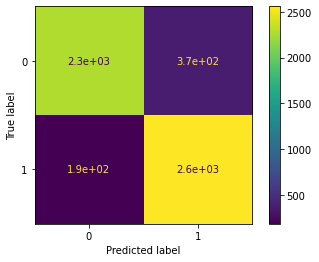

In [ ]:
w1, w2 = print_report(hardvoting_pipe, X_valid, y_valid)

### Neural Nets

In [ ]:
# @title 1-Cycle Policy

import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.callbacks import Callback
from keras import backend as K

class _CyclicalScheduler(Callback):
  def __init__(self, 
               max_lr,
               base_lr=None,
               div_factor=20,
               cyclical_momentum=True,
               base_momentum=0.85,
               max_momentum=0.95):
    
    """Base class for cyclical learning rate scheduler.

    Args:
      max_lr (float): The upper learning rate bound in the cycle.
      base_lr (float): The lower learning rate bound or the initial learning rate in the cycle. 
        If not provided, it is determined as max_lr/div_factor.
        Default: None
      div_factor (float or int): Determines the lower learning rate bound as max_lr/div_factor.
        Default: 20
      cyclical_momentum (bool): If ``True``, cyclical momentum will be used.
        Default: True
      base_momentum (float): The lower momentum bound or the initial momentum in the cycle.
        Default: 0.85
      max_momentum (float): The upper momentum bound in the cycle.
        Default: 0.95
    """
    super().__init__()

    if not max_lr and not base_lr:
      raise ValueError('Either max_lr or base_lr must be defined.')
    elif max_lr and base_lr:
      self.max_lr = max_lr
      self.base_lr = base_lr
    elif max_lr:
      self.max_lr = max_lr
      self.base_lr = max_lr / div_factor
    else:
      self.max_lr = base_lr * div_factor
      self.base_lr = base_lr

    # It is called "epochCounter" in the original papper. However,
    # it increases after each batch ends, therefore, I call it batch_counter.
    self.batch_counter = 0
    self.train_iterations = 0
    self.cyclical_momentum = cyclical_momentum
    self.base_momentum = base_momentum
    self.max_momentum = max_momentum
    self.history = {}

    self._reset()

  def _reset(self):
    # Reset the batch counter. 
    self.batch_counter = 0

  def get_momentum(self):
    raise NotImplementedError

  def get_lr(self):
    raise NotImplementedError

  def plot_lr(self, figsize=(10, 3)):
    if not self.train_iterations or not self.history:
      raise ValueError('Nothing to plot. Train the model first.')
    
    totals = 1
    cols = 1
    y = [self.history['lrs']]
    x = self.history['iterations']
    ylabels = ['Learning Rate']
    
    if self.cyclical_momentum:
      totals += 1
      cols += 1
      y.append(self.history['moms'])
      ylabels.append('Momentum')

    position = range(1, totals + 1)
    fig = plt.figure(figsize=figsize)

    for i in range(totals):
      ax = fig.add_subplot(1, cols, position[i])
      ax.plot(x, y[i])
      ax.set_xlabel('Iteration')
      ax.set_ylabel(ylabels[i])

    fig.tight_layout(pad=3.0)
    plt.show()

  def plot_train_accr_lr(self):
    if not self.batch_counter or not self.history:
      raise ValueError('Nothing to plot. Train the model first.')
    
    accs = self.history['accuracy']
    lrs = self.history['lrs']

    # max_y = np.max(accs)
    # max_x = np.max(lrs)
    # min_x = np.min(lrs)

    plt.title('Train Accuracy vs Learning Rate')
    plt.plot(lrs, accs)
    # plt.plot([min_x, max_x], [max_y, max_y], 'r--')
    plt.xlabel('Learning Rate')
    plt.ylabel('Train Accuracy')

  def _check_support(self):
    if not hasattr(self.model.optimizer, 'lr'):
      raise ValueError('Optimizer must have a "lr" attribute to use cyclical learning rate.')

    if self.cyclical_momentum and not hasattr(self.model.optimizer, 'momentum'):
      raise ValueError('Optimizer must have a "momentum" attribute to use cyclical momentum.')

  def on_train_begin(self, logs={}):
    self._check_support()
    logs = logs or {}

    if self.batch_counter == 0:
      K.set_value(self.model.optimizer.lr, self.base_lr)

      if self.cyclical_momentum:
        K.set_value(self.model.optimizer.momentum, self.max_momentum)
    else:
      K.set_value(self.model.optimizer.lr, self.get_lr())

      if self.cyclical_momentum:
        K.set_value(self.model.optimizer.momentum, self.get_momentum())

  def on_batch_end(self, epoch, logs={}):
    self._check_support()
    logs = logs or {}

    # Increase the epoch counter.
    self.batch_counter += 1
    self.train_iterations += 1

    # Keep track of the learning rates.
    self.history.setdefault('lrs', []).append(K.get_value(self.model.optimizer.lr))
    self.history.setdefault('iterations', []).append(self.train_iterations)
    K.set_value(self.model.optimizer.lr, self.get_lr())

    # Also keep track of accuracy.
    for key, value in logs.items():
      self.history.setdefault(key, []).append(value)

    # self.history.setdefault('accuracy', []).append(logs['accuracy'])

    # Keep track of momentums if supported.
    if self.cyclical_momentum:
      self.history.setdefault('moms', []).append(K.get_value(self.model.optimizer.momentum))
      K.set_value(self.model.optimizer.momentum, self.get_momentum())

import numpy as np

class CyclicalLR(_CyclicalScheduler):
  def __init__(self,
               max_lr,
               base_lr=None,
               div_factor=20,
               cyclical_momentum=True,
               base_momentum=0.85,
               max_momentum=0.95,
               step_size=2000.0,
               policy='triangular',
               gamma=1.0,
               scale_mode='cycle',
               scaler=None):
    """Sets the learning rate according to the cyclical learning rate policy (CLR)
    mentioned in `Cyclical Learning Rates for Training Neural Networks`_. The policy varies 
    the learning rate (in some cases, and the momentum) between the upper bound and
    the lower bound. Note that the policy updates the learning rate after very batch.

    There are 3 CLR policies implemented in this class:
      1. "triangular": A triangular cycle without amplitude scaling.
      2. "triangular2": The same as the "triangular" except the learning rate difference
      is cut in half at the end of each cycle.
      3. "exp_range": The boundaries are declined by an exponential factor of :math:`\text{gamma}^{\text{cycle iterations}}` 

    Args:
      max_lr (float): The upper learning rate bound in the cycle.
      base_lr (float): The lower learning rate bound or the initial learning rate in the cycle. 
        If not provided, it is determined as max_lr/div_factor.
        Default: None
      div_factor (float or int): Determines the lower learning rate bound as max_lr/div_factor.
        Default: 20
      cyclical_momentum (bool): If ``True``, cyclical momentum will be used.
        Default: True
      base_momentum (float): The lower momentum bound or the initial momentum in the cycle.
        Default: 0.85
      max_momentum (float): The upper momentum bound in the cycle.
        Default: 0.95
      step_size (float): The number of training iterations in half a cycle. Since, cycle=step_size*2
        Default: 2000.0
      policy (string): One of {triangular, triangular2, exp_range}. Each comes with a different scaler.
        If scaler is defined, this argument is ignored.
        Default: 'triangular'
      gamma (float): Constant used in 'exp_range' scaler.
        Default: 1.0
      scale_mode (str): One of {'cycle', 'iterations'}. Scaling mode of the scaler.
        Default: 'cycle'
      scaler (function): Custom scaler. Notice that the result of the scaler should be between 0 and 1.
        Default: None.

      .. _Cyclical Learning Rates for Training Neural Networks: https://arxiv.org/abs/1506.01186
    """
    super().__init__(max_lr, base_lr, div_factor, cyclical_momentum, base_momentum, max_momentum)

    if policy not in ['triangular', 'triangular2', 'exp_range']:
      raise ValueError('Supported policies are "triangular", "triangular2", and "exp_range"')
    
    self.step_size = step_size
    self.policy = policy
    self.gamma = gamma
    
    if not scaler:
      if self.policy == 'triangular':
        self.scaler = self._triangular_scaler
        self.scale_mode = 'cycle'
      elif self.policy == 'triangular2':
        self.scaler = self._triangular2_scaler
        self.scale_mode = 'cycle'
      else:
        self.scaler = self._exp_range_scaler
        self.scale_mode = 'iterations'
    else:
      self.scaler = scaler
      self.scale_mode = scale_mode
      
  def _triangular_scaler(self, x):
    return 1

  def _triangular2_scaler(self, x):
    return 1.0 / (2.0 ** (x - 1))

  def _exp_range_scaler(self, x):
    return self.gamma**x

  def get_lr(self):
    # Calculate the current cycle.
    cycle = np.floor(1 + self.batch_counter/(2 * self.step_size))

    # x will be negative so (1-x) will be positive on the first half of a cycle, therefore, the learning rate will go up.
    # On the other hand, it will be positive so (1-x) will be negative on the second half of a cycle, makes the learning rate go down.
    x = np.abs(1 + self.batch_counter/self.step_size - 2 * cycle)

    # Update the learning rate.
    lr = (self.max_lr - self.base_lr) * np.maximum(0, (1 - x))

    if self.scale_mode == 'cycle':
      lr *= self.scaler(cycle)
    else:
      lr *= self.scaler(self.batch_counter)

    return self.base_lr + lr

  def get_momentum(self):
    cycle = np.floor(1 + self.batch_counter/(2 * self.step_size))
    x = np.abs(1 + self.batch_counter/self.step_size - 2 * cycle)
    momentum = (self.max_momentum - self.base_momentum) * max(0, (1 - x))

    if self.scale_mode == 'cycle':
      momentum *= self.scaler(cycle)
    else:
      momentum *= self.scaler(self.batch_counter)

    return self.max_momentum - momentum

import math

class OneCycle(CyclicalLR):
  def __init__(self,
               max_lr,
               base_lr=None,
               div_factor=20,
               cyclical_momentum=True,
               base_momentum=0.85,
               max_momentum=0.95, 
               total_steps=None,
               epochs=None,
               steps_per_epoch=None,
               min_div_factor=1e4,
               inc_ratio=0.3,
               anneal='linear'):
    """Anneals the learning rate according to the 1cycle learning rate policy. In short,
    the 1cycle policy anneals the learning rate from a base learning rate to the maximum learning rate and then
    from there to the minimum learning rate (which is lower than the the base learning rate according to the author).

    Args:
        max_lr (float): The upper learning rate bound in the cycle.
        base_lr (float): The lower learning rate bound or the initial learning rate in the cycle. 
          If not provided, it is determined as max_lr/div_factor.
          Default: None
        div_factor (float or int): Determines the lower learning rate bound as max_lr/div_factor.
          Default: 20
        cyclical_momentum (bool): If ``True``, cyclical momentum will be used.
          Default: True
        base_momentum (float): The lower momentum bound or the initial momentum in the cycle.
          Default: 0.85
        max_momentum (float): The upper momentum bound in the cycle.
          Default: 0.95
        total_steps (int): The total number of steps in the cycle. If not provided,
          then it will be computed using epochs and steps_per_epoch.
        epochs (int): The number of epochs. 
        steps_per_epoch (int): The number of steps per epoch. Typically,
          equals to ceil(num_samples / batch_size).
        min_div_factor (float): Determines the minimum learning rate bound as base_lr/min_div_factor.
          Default: 1e4
        inc_ratio (float): The ratio of the cycle for increasing the learning rate from 0 to 1.
          Default: 0.3
        anneal (str): Type of annealing function used. One of {linear, cosine, exp}.
          Default: 'linear'
    """
    
    super().__init__(max_lr, base_lr, div_factor, cyclical_momentum, base_momentum, max_momentum)

    if total_steps is None and epochs is None and steps_per_epoch is None:
      raise ValueError('Either total_steps or (epochs and steps_per_epoch) must be defined.')
    elif total_steps is not None:
      self.total_steps = total_steps
    else:
      self.total_steps = epochs * steps_per_epoch

    if inc_ratio < 0 or inc_ratio > 1:
      raise ValueError(f'Expected 0 <= inc_ratio <= 1, got {inc_ratio}.')

    # Compute number of steps the learning rate goes up and down.
    # self.step_size_up = float(inc_ratio * self.total_steps) - 1
    self.step_size_up = float(inc_ratio * self.total_steps) - 1
    self.step_size_down = float(self.total_steps - self.step_size_up) - 1
  
    # Since the author wanted to keep decreasing the learning rate for several last iterations,
    # the min_lr is the smallest value the learning rate can be.
    self.min_lr = self.base_lr/min_div_factor

    if anneal == 'linear':
      self.annealer = self._lin_annealing
    elif anneal == 'exp':
      self.annealer = self._exp_annealing  
    else:
      self.annealer = self._cos_annealing

  def _exp_annealing(self, start, end, ratio):
    """Anneal exponentially from `start` to `end` as `ratio` goes from 0.0 to 1.0"""
    return start * (end/start) ** ratio

  def _cos_annealing(self, start, end, ratio):
    """Cosine anneal from `start` to `end` as `ratio` goes from 0.0 to 1.0"""
    return end + (start - end)/2.0 * (math.cos(math.pi * ratio) + 1)

  def _lin_annealing(self, start, end, ratio):
    """Anneal linearly from `start` to `end` as `ratio` goes from 0.0 to 1.0"""
    return start + (end - start) * ratio

  def get_lr(self):
    step_num = self.batch_counter

    # If the number of total steps defined smaller than the current epoch counter,
    # the learning rate will be negative.
    if step_num > self.total_steps:
      raise ValueError(f'Tried to step {step_num} times. The specified number of total steps is {self.total_steps}')

    if step_num <= self.step_size_up:
      lr = self.annealer(self.base_lr, self.max_lr, step_num/self.step_size_up)
    else:
      down_step_num = step_num - self.step_size_up
      lr = self.annealer(self.max_lr, self.min_lr, down_step_num/self.step_size_down)
  
    return lr

  def get_momentum(self):
    step_num = self.batch_counter

    if step_num > self.total_steps:
      raise ValueError(f'Tried to step {step_num} times. The specified number of total steps is {self.total_steps}')

    if step_num <= self.step_size_up:
      momentum = self.annealer(self.max_momentum, self.base_momentum, step_num/self.step_size_up)
    else:
      down_step_num = step_num - self.step_size_up
      momentum = self.annealer(self.base_momentum, self.max_momentum, down_step_num/self.step_size_down)
    
    return momentum

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

In [40]:
X_train, X_valid, y_train, y_valid = train_test_split(train['text'], train['class'], test_size=0.3, random_state=42)

max_features = 10000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(X_train.values)

X_train = tokenizer.texts_to_sequences(X_train.values)
X_train = pad_sequences(X_train, 1000)
X_valid = tokenizer.texts_to_sequences(X_valid.values)
X_valid = pad_sequences(X_valid, 1000)

In [41]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)

In [16]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from gensim.models.keyedvectors import KeyedVectors

word_index = tokenizer.word_index

def get_viword2vec():
  word_vectors = KeyedVectors.load_word2vec_format(f'{data_path}/baomoi.model.bin', binary=True)

  embedding_dim=400
  vocabulary_size = min(len(word_index) + 1, max_features)
  embedding_matrix = np.zeros((vocabulary_size, embedding_dim))
  for word, i in word_index.items():
      if i >= max_features:
          continue
      try:
          embedding_vector = word_vectors[word]
          embedding_matrix[i] = embedding_vector
      except KeyError:
          embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25), embedding_dim)

  del(word_vectors)
  return embedding_matrix

embedding_weights = get_viword2vec()

In [17]:
embed_dim = 400
lstm_out = 196
embedding_layer = Embedding(max_features, embed_dim, weights=[embedding_weights], trainable=True)

GRU

In [54]:
from keras.layers import GRU, Dropout
from keras.callbacks import EarlyStopping

# GRU with embeddings and two dense layers
model = Sequential()
model.add(embedding_layer)
model.add(SpatialDropout1D(0.3))
model.add(GRU(300, dropout=0.3, recurrent_dropout=0.3, return_sequences=True))
model.add(GRU(300, dropout=0.3, recurrent_dropout=0.3))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model with early stopping callback
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')

model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_valid, y_valid), callbacks=[earlystop])

Epoch 1/10
119/119 [==============================] - 820s 7s/step - loss: 0.5342 - accuracy: 0.7456 - val_loss: 0.3686 - val_accuracy: 0.8404
Epoch 2/10
119/119 [==============================] - 832s 7s/step - loss: 0.3206 - accuracy: 0.8751 - val_loss: 0.2891 - val_accuracy: 0.8884
Epoch 3/10
119/119 [==============================] - 841s 7s/step - loss: 0.2610 - accuracy: 0.9033 - val_loss: 0.2767 - val_accuracy: 0.8909
Epoch 4/10
119/119 [==============================] - 825s 7s/step - loss: 0.2388 - accuracy: 0.9118 - val_loss: 0.2873 - val_accuracy: 0.8846
Epoch 5/10
119/119 [==============================] - 821s 7s/step - loss: 0.2211 - accuracy: 0.9182 - val_loss: 0.2655 - val_accuracy: 0.8940
Epoch 6/10
119/119 [==============================] - 820s 7s/step - loss: 0.2052 - accuracy: 0.9263 - val_loss: 0.2696 - val_accuracy: 0.8914
Epoch 7/10
119/119 [==============================] - 811s 7s/step - loss: 0.1994 - accuracy: 0.9298 - val_loss: 0.3004 - val_accuracy: 0.8869

In [57]:
test = pd.read_csv(f'{data_path}/prep_test.csv', header=0)
X_test = tokenizer.texts_to_sequences(test['text'].values)
X_test = pad_sequences(X_test, 1000)

y_pred = model.predict(X_test, batch_size=128)

In [62]:
result = np.argmax(y_pred, axis=1)
test['class'] = result
submission = test[['id','class']]
submission.to_csv('nn_submission.csv', index=False)

In [63]:
submission['class'].value_counts()

1    1587
0    1413
Name: class, dtype: int64

In [64]:
svm_submission = pd.read_csv(f'{data_path}/submission.csv', header=0)
nn_submission = submission.copy()
nn_submission['class_svm'] = svm_submission['class']
diff = nn_submission.loc[nn_submission['class'] != nn_submission['class_svm']]

In [66]:
diff['text'] = test['text']
diff.to_csv('diff.csv', index=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dimport tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping

model = keras.models.load_model('drive/My Drive/hiip/gru_897')

ConvNet

In [47]:
from keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dropout
from keras.models import Model

model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.25))
model.add(Conv1D(64, 4, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(Dropout(0.25))
model.add(LSTM(70))
model.add(Dropout(0.25))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        multiple                  4000000   
_________________________________________________________________
dropout_5 (Dropout)          (None, None, 400)         0         
_________________________________________________________________
conv1d_34 (Conv1D)           (None, None, 64)          102464    
_________________________________________________________________
max_pooling1d_34 (MaxPooling (None, None, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, None, 64)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 70)                37800     
_________________________________________________________________
dropout_7 (Dropout)          (None, 70)              

In [48]:
history = model.fit(X_train, y_train, batch_size=64, epochs=10, shuffle=True, validation_data=(X_valid, y_valid))

Epoch 1/10
237/237 [==============================] - 26s 112ms/step - loss: 0.3680 - accuracy: 0.8395 - val_loss: 0.3109 - val_accuracy: 0.8747
Epoch 2/10
237/237 [==============================] - 26s 109ms/step - loss: 0.2656 - accuracy: 0.8976 - val_loss: 0.3231 - val_accuracy: 0.8772
Epoch 3/10
237/237 [==============================] - 27s 112ms/step - loss: 0.2382 - accuracy: 0.9105 - val_loss: 0.2922 - val_accuracy: 0.8870
Epoch 4/10
237/237 [==============================] - 26s 112ms/step - loss: 0.2193 - accuracy: 0.9153 - val_loss: 0.3278 - val_accuracy: 0.8792
Epoch 5/10
237/237 [==============================] - 26s 110ms/step - loss: 0.2001 - accuracy: 0.9253 - val_loss: 0.3141 - val_accuracy: 0.8860
Epoch 6/10
237/237 [==============================] - 26s 110ms/step - loss: 0.1876 - accuracy: 0.9298 - val_loss: 0.3263 - val_accuracy: 0.8821
Epoch 7/10
237/237 [==============================] - 26s 110ms/step - loss: 0.1778 - accuracy: 0.9341 - val_loss: 0.3075 - val_ac

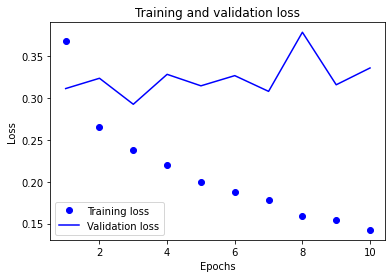

In [52]:
# Plot the learning curve.
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

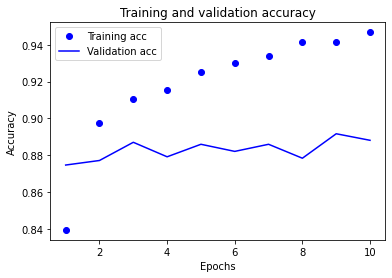

In [53]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()